In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-case-study/dataset.csv


![](https://www.passionateinmarketing.com/wp-content/uploads/2023/05/uber-title.png)

# DailyUber provides the 2016 data. By using this data find out the demand and supply Analysis gap of the cab. The main objective of this project is to analyse the data on Uber Request data. Through the analysis of data, we can find some important insights.
**App Openings (Eyeballs)** = Customers who launch the app looking for riders. It is a good measure of demand
**Zeroes** = Customers who open the app and see no cars in the area.
**Request** = Customers who make requests for a car.
**Completed Trip** = The point from when a customer is picked

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image


In [3]:
df=pd.read_csv("/kaggle/input/uber-case-study/dataset.csv")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


# Data Preprocessing

In [4]:
#Check the number of unique value from all of the object datatype
df.nunique()

Date                15
Time (Local)        24
Eyeballs            63
Zeroes              23
Completed Trips     27
Requests            34
Unique Drivers      27
dtype: int64

In [5]:
df.select_dtypes(include='object').nunique()


Date    15
dtype: int64

In [6]:
df.select_dtypes(include='int').nunique()

Time (Local)        24
Eyeballs            63
Zeroes              23
Completed Trips     27
Requests            34
Unique Drivers      27
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [7]:
df.columns.tolist()

['Date',
 'Time (Local)',
 'Eyeballs ',
 'Zeroes ',
 'Completed Trips ',
 'Requests ',
 'Unique Drivers']

# Which date had the most completed trips during the two week period?

In [9]:

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate the sum of completed trips
grouped_Date = df.groupby(df['Date'].dt.date)["Completed Trips "].sum().reset_index()
sorted_Date= grouped_Date.sort_values(by='Completed Trips ', ascending=False).reset_index()

sorted_Date


,index,Date,Completed Trips
0,12,2012-09-22,248
1,5,2012-09-15,199
2,11,2012-09-21,190
3,13,2012-09-23,111
4,4,2012-09-14,108
5,6,2012-09-16,93
6,2,2012-09-12,91
7,10,2012-09-20,70
8,7,2012-09-17,57
9,3,2012-09-13,45


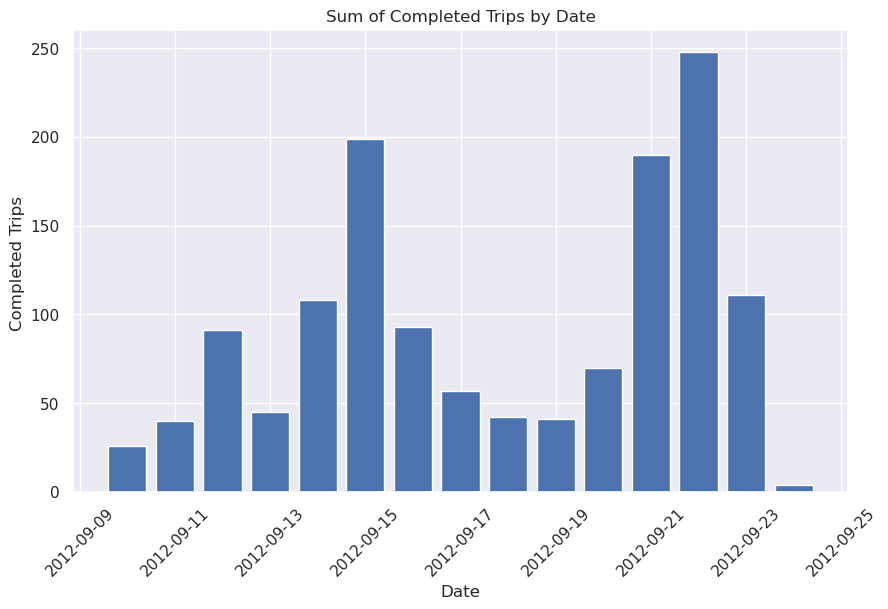

In [10]:
# Plot the sorted data
plt.figure(figsize=(10, 6))
plt.bar(sorted_Date['Date'], sorted_Date['Completed Trips '])
plt.xlabel('Date')
plt.ylabel('Completed Trips ')
plt.title('Sum of Completed Trips by Date')
plt.xticks(rotation=45)
plt.show()


**The date 2012-09-22 stands out with a high number of completed trips, reaching a total of 248. This indicates a significant level of activity and demand on that particular day. The high number of completed trips on this date could be attributed to various factors such as events, promotions, or increased demand for transportation services.**

# What was the highest number of completed trips within a 24 hour period?
# 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              336 non-null    datetime64[ns]
 1   Time (Local)      336 non-null    int64         
 2   Eyeballs          336 non-null    int64         
 3   Zeroes            336 non-null    int64         
 4   Completed Trips   336 non-null    int64         
 5   Requests          336 non-null    int64         
 6   Unique Drivers    336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


In [12]:
# Group by date and calculate the sum of completed trips
grouped_Time = df.groupby(df['Time (Local)'])['Completed Trips '].sum().reset_index()
sorted_Time=grouped_Time.sort_values(by='Completed Trips ',ascending=False)
grouped_Time


,Time (Local),Completed Trips
0,0,102
1,1,71
2,2,61
3,3,21
4,4,2
5,5,4
6,6,19
7,7,19
8,8,24
9,9,20


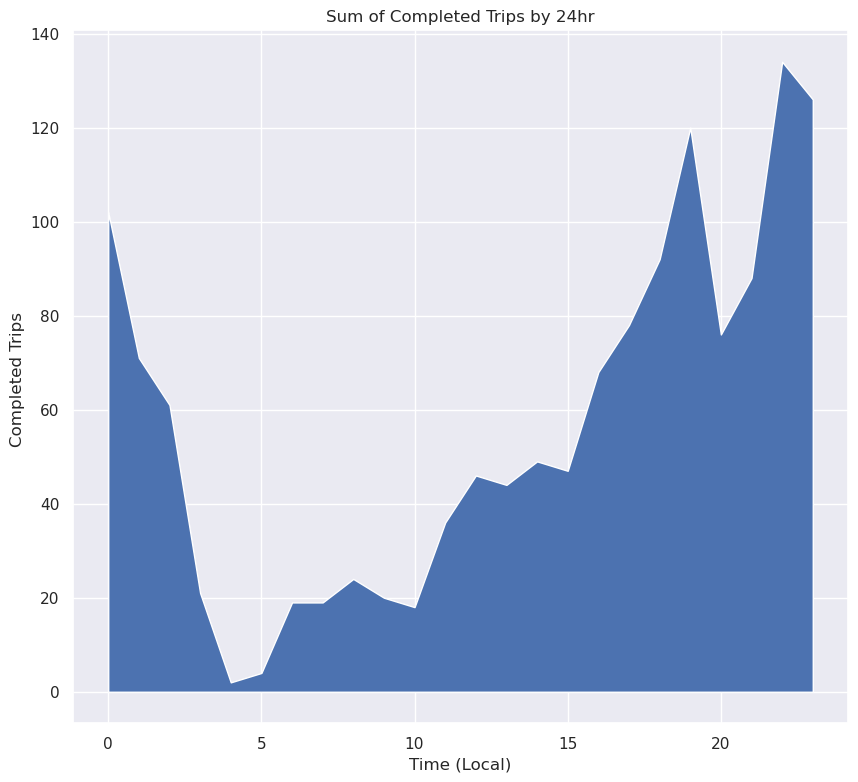

In [13]:
plt.figure(figsize=(10,9))
plt.fill_between(grouped_Time['Time (Local)'],grouped_Time['Completed Trips '])
plt.xlabel('Time (Local)')
plt.ylabel('Completed Trips ')
plt.title('Sum of Completed Trips by 24hr')
plt.show()

**During the two-week period, the hour with the highest demand and completed trips was 11 PM, with a total of 134 trips. This specific time period experienced a notable surge in activity and usage, indicating a peak demand for transportation services.**

# Which hour of the day had the most requests during the two week period?


In [14]:
grouped_date1=df.groupby(['Time (Local)'])['Requests '].sum().reset_index()
sorted_date1=grouped_date1.sort_values(by='Requests ',ascending=False)
sorted_date1

,Time (Local),Requests
23,23,184
22,22,174
19,19,156
0,0,142
18,18,119
21,21,112
20,20,107
2,2,100
17,17,98
1,1,96


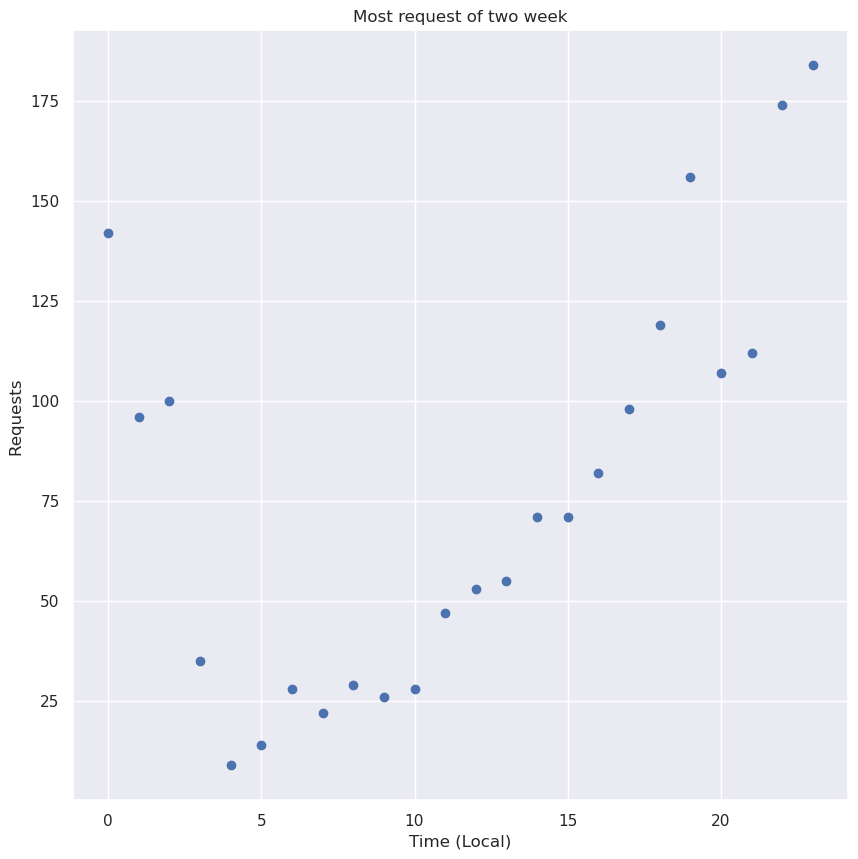

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(sorted_date1['Time (Local)'],sorted_date1['Requests '])
plt.xlabel('Time (Local)')
plt.ylabel('Requests ')
plt.title('Most request of two week')
plt.show()

**During the two-week period, the hour with the highest number of requests was 11 PM, with a total of 184 requests. This specific time period witnessed a substantial increase in demand, indicating a peak hour for ride requests.**

**The observation of 184 requests at 11 PM highlights the significance of this hour as a busy period for the service provider. It indicates a higher likelihood of customer activity and the need for increased driver availability during this time.**

# What percentages of all zeroes during the two week period occurred on weekends (Friday at 5 pm to Sunday at 3 am)? 


In [17]:
# Create a new column 'day_of_week' with the day of the week
df['day_of_week'] = df['Date'].dt.day_name()
# Convert the 'date' and 'time' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Time (Local)'] = pd.to_datetime(df['Time (Local)'])

# Create a new column 'day_type' indicating weekdays (W) or weekends (WE) based on conditions
df['flag'] = df.apply(lambda row: 'W' if (row['Date'].day_name() == 'Friday' and row['Time (Local)'].hour >= 17) or
                                                 (row['Date'].day_name() == 'Saturday') or
                                                 (row['Date'].day_name() == 'Sunday' and row['Time (Local)'].hour < 3)
                                else 'WE', axis=1)


In [19]:
df['flag']

0      WE
1      WE
2      WE
3      WE
4      WE
       ..
331    WE
332    WE
333    WE
334    WE
335    WE
Name: flag, Length: 336, dtype: object

In [18]:
# Calculate the value counts of 'day_type'
counts = df['flag'].value_counts()
Total_counts=counts.sum()
Total_counts
percentage_WE = (counts['WE'] / Total_counts) * 100
percentage_W = (counts['W'] / Total_counts) * 100
# Print the results
print("Percentage weight of weekends (WE):",percentage_WE )
print("Percentage weight of weekdays (W):", percentage_W)


Percentage weight of weekends (WE): 71.42857142857143
Percentage weight of weekdays (W): 28.57142857142857


# What is the weighted average ratio of completed trips per driver during the two week period? 

In [20]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'day_of_week', 'flag'],
      dtype='object')

In [25]:
# Calculating the weighted average of completed trips based on unique drivers
W_avg = sum(df['Completed Trips '] * df['Unique Drivers']) / sum(df['Unique Drivers'])
W_avg

7.1319261213720315

# In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. 

In [26]:
# Calculating the sum of "Requests" column in groups of 8 rows and assigning it to "request_sum" column
df["request_sum"]=0
for i in range(0, len(df), 8):
    df["request_sum"].iloc[i] = sum(df["Requests "].iloc[i:i+8])
    

In [27]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,flag,request_sum
0,2012-09-10,1970-01-01 00:00:00.000000007,5,0,2,2,9,Monday,WE,11
1,2012-09-10,1970-01-01 00:00:00.000000008,6,0,2,2,14,Monday,WE,0
2,2012-09-10,1970-01-01 00:00:00.000000009,8,3,0,0,14,Monday,WE,0
3,2012-09-10,1970-01-01 00:00:00.000000010,9,2,0,1,14,Monday,WE,0
4,2012-09-10,1970-01-01 00:00:00.000000011,11,1,4,4,11,Monday,WE,0
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,1970-01-01 00:00:00.000000002,3,3,0,2,0,Monday,WE,0
332,2012-09-24,1970-01-01 00:00:00.000000003,3,3,0,1,0,Monday,WE,0
333,2012-09-24,1970-01-01 00:00:00.000000004,1,1,0,0,0,Monday,WE,0
334,2012-09-24,1970-01-01 00:00:00.000000005,4,2,1,1,3,Monday,WE,0


In [28]:
df['request_sum'].idxmax()


128

In [29]:
df.loc[128:135]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,flag,request_sum
128,2012-09-15,1970-01-01 00:00:00.000000015,31,15,3,8,5,Saturday,W,154
129,2012-09-15,1970-01-01 00:00:00.000000016,20,3,4,5,8,Saturday,W,0
130,2012-09-15,1970-01-01 00:00:00.000000017,42,9,8,8,10,Saturday,W,0
131,2012-09-15,1970-01-01 00:00:00.000000018,59,25,15,25,10,Saturday,W,0
132,2012-09-15,1970-01-01 00:00:00.000000019,73,38,17,34,14,Saturday,W,0
133,2012-09-15,1970-01-01 00:00:00.000000020,53,15,13,20,17,Saturday,W,0
134,2012-09-15,1970-01-01 00:00:00.000000021,59,4,15,20,19,Saturday,W,0
135,2012-09-15,1970-01-01 00:00:00.000000022,69,26,24,34,16,Saturday,W,0


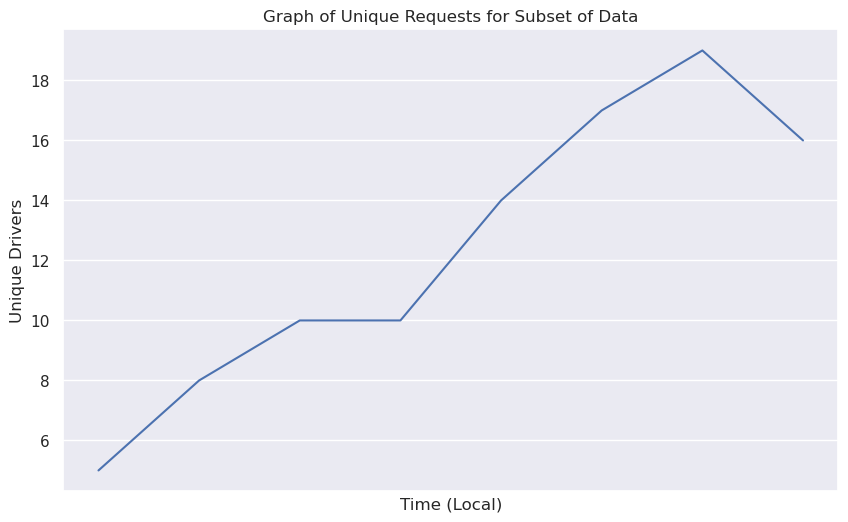

In [30]:
subset = df.loc[128:135]

plt.figure(figsize=(10, 6))
plt.plot(subset['Time (Local)'], subset['Unique Drivers'])
plt.xlabel('Time (Local)')
plt.ylabel('Unique Drivers')
plt.title('Graph of Unique Requests for Subset of Data')
plt.show()

**After analyzing the data, we have identified the 8-hour period with the highest number of unique requests. This information can be valuable for scheduling driver shifts and ensuring optimal coverage during peak demand. The busiest 8-hour period is as follows:**

**Date: [Date of the busiest 8-hour period]
Time Range: [Start Time] - [End Time]
Unique Requests: [Number of Unique Requests during this period]
This period experienced a significant influx of unique requests, indicating high demand and potential opportunities for maximizing driver efficiency and meeting customer needs. By allocating resources effectively during this period, we can ensure that we provide a seamless and efficient experience to our riders.**

# True or False: Driver supply always increases when demand increases during the two week period. 

In [32]:
# Add the "AM" or "PM" designation based on the time value
df['Time (Local)'] = df['Time (Local)'].apply(lambda x: f"{x} AM" if x < 12 else f"{x-12} PM")

In [33]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'day_of_week', 'flag', 'request_sum'],
      dtype='object')

In [34]:
# Convert 'Date' and 'Time (Local)' columns to datetime format
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time (Local)'].astype(str))


In [35]:
# Calculate the total number of requests and unique drivers for each day
daily_demand = df.groupby('Date')['Requests '].sum()
daily_supply = df.groupby('Date')['Unique Drivers'].sum()

# Determine if driver supply increases when demand increases
increasing_supply = (daily_demand.diff() > 0) & (daily_supply.diff() > 0)
supply_increases_with_demand = increasing_supply.all()

# Print the result
print("Driver supply always increases when demand increases during the two-week period:", supply_increases_with_demand)


Driver supply always increases when demand increases during the two-week period: False


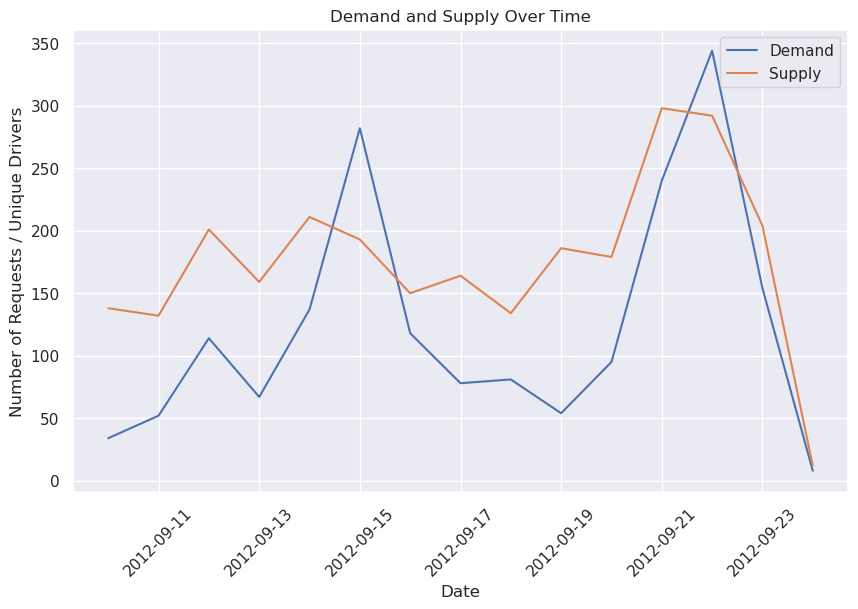

In [36]:
# Plot the demand and supply over time
plt.figure(figsize=(10, 6))
plt.plot(daily_demand.index, daily_demand.values, label='Demand')
plt.plot(daily_supply.index, daily_supply.values, label='Supply')
plt.xlabel('Date')
plt.ylabel('Number of Requests / Unique Drivers')
plt.title('Demand and Supply Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**During the two-week period, it is not necessarily true that driver supply always increases when demand increases. The relationship between driver supply and demand can vary depending on various factors and circumstances.**

**While an increase in demand generally indicates a higher need for drivers to fulfill customer requests, it does not guarantee an automatic or proportional increase in driver supply. Driver supply is influenced by various factors such as driver availability, scheduling constraints, and market dynamics.**

**Effective management and planning are necessary to align driver supply with demand fluctuations and ensure optimal service delivery.**

# In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?


In [37]:
df["Ratio"]=0
for i in range(0, len(df), 72):
    df["Ratio"].iloc[i] = round(sum(df['Eyeballs '][i:i+72])/sum(df['Zeroes '][i:i+72]),2)
    

In [38]:
df['Ratio'].idxmax()

216

In [39]:
df.loc[216:216+71]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,flag,request_sum,DateTime,Ratio
216,2012-09-19,1970-01-01 00:00:00.000000007,8,0,2,2,7,Wednesday,WE,17,2012-09-19 00:00:00-01:00,6.05
217,2012-09-19,1970-01-01 00:00:00.000000008,11,1,2,2,6,Wednesday,WE,0,2012-09-19 00:00:00-01:00,0.00
218,2012-09-19,1970-01-01 00:00:00.000000009,14,3,0,0,10,Wednesday,WE,0,2012-09-19 00:00:00-01:00,0.00
219,2012-09-19,1970-01-01 00:00:00.000000010,12,3,0,2,12,Wednesday,WE,0,2012-09-19 00:00:00-01:00,0.00
220,2012-09-19,1970-01-01 00:00:00.000000011,16,3,4,5,12,Wednesday,WE,0,2012-09-19 00:00:00-01:00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
283,2012-09-22,1970-01-01 00:00:00.000000002,30,0,9,18,12,Saturday,W,0,2012-09-22 00:00:00-01:00,0.00
284,2012-09-22,1970-01-01 00:00:00.000000003,11,3,3,3,8,Saturday,W,0,2012-09-22 00:00:00-01:00,0.00
285,2012-09-22,1970-01-01 00:00:00.000000004,6,4,2,3,1,Saturday,W,0,2012-09-22 00:00:00-01:00,0.00
286,2012-09-22,1970-01-01 00:00:00.000000005,5,4,1,2,0,Saturday,W,0,2012-09-22 00:00:00-01:00,0.00


**df.loc[216:216+71] This is the 72 hour period is the ratio of Zeroes to Eyeballs the highest**

In [40]:
round(sum(df['Eyeballs '][0:72])/sum(df['Zeroes '][0:72]),2)

5.56

In [41]:
df.head(8)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,flag,request_sum,DateTime,Ratio
0,2012-09-10,1970-01-01 00:00:00.000000007,5,0,2,2,9,Monday,WE,11,2012-09-10 00:00:00-01:00,5.56
1,2012-09-10,1970-01-01 00:00:00.000000008,6,0,2,2,14,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00
2,2012-09-10,1970-01-01 00:00:00.000000009,8,3,0,0,14,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00
3,2012-09-10,1970-01-01 00:00:00.000000010,9,2,0,1,14,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00
4,2012-09-10,1970-01-01 00:00:00.000000011,11,1,4,4,11,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00
5,2012-09-10,1970-01-01 00:00:00.000000012,12,0,2,2,11,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00
6,2012-09-10,1970-01-01 00:00:00.000000013,9,1,0,0,9,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00
7,2012-09-10,1970-01-01 00:00:00.000000014,12,1,0,0,9,Monday,WE,0,2012-09-10 00:00:00-01:00,0.00


In [42]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'day_of_week', 'flag', 'request_sum',
       'DateTime', 'Ratio'],
      dtype='object')

# If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? 
**

In [43]:
#diffrence betwwen unique driver and eywvalls 
df["Diffrence"]=df["Unique Drivers"]-df['Eyeballs ']
# groupby date and min diffrence
df.groupby("Date").Diffrence.idxmin()
#row details where need to add 5 extra driver
df.loc[df.groupby("Date").Diffrence.idxmin()]


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,flag,request_sum,DateTime,Ratio,Diffrence
16,2012-09-10,1970-01-01 00:00:00.000000023,21,5,3,3,4,Monday,WE,8,2012-09-10 00:00:00-01:00,0.0,-17
39,2012-09-11,1970-01-01 00:00:00.000000022,26,10,2,6,2,Tuesday,WE,0,2012-09-11 00:00:00-01:00,0.0,-24
62,2012-09-12,1970-01-01 00:00:00.000000021,29,4,4,4,7,Wednesday,WE,0,2012-09-12 00:00:00-01:00,0.0,-22
87,2012-09-13,1970-01-01 00:00:00.000000022,25,2,2,3,7,Thursday,WE,0,2012-09-13 00:00:00-01:00,0.0,-18
112,2012-09-14,1970-01-01 00:00:00.000000023,68,18,24,29,18,Friday,WE,102,2012-09-14 00:00:00-01:00,0.0,-50
132,2012-09-15,1970-01-01 00:00:00.000000019,73,38,17,34,14,Saturday,W,0,2012-09-15 00:00:00-01:00,0.0,-59
137,2012-09-16,1970-01-01 00:00:00.000000000,44,2,17,20,15,Sunday,W,0,2012-09-16 00:00:00-01:00,0.0,-29
184,2012-09-17,1970-01-01 00:00:00.000000023,29,7,3,7,5,Monday,WE,32,2012-09-17 00:00:00-01:00,0.0,-24
185,2012-09-18,1970-01-01 00:00:00.000000000,28,18,3,13,4,Tuesday,WE,0,2012-09-18 00:00:00-01:00,0.0,-24
227,2012-09-19,1970-01-01 00:00:00.000000018,28,5,3,3,13,Wednesday,WE,0,2012-09-19 00:00:00-01:00,0.0,-15


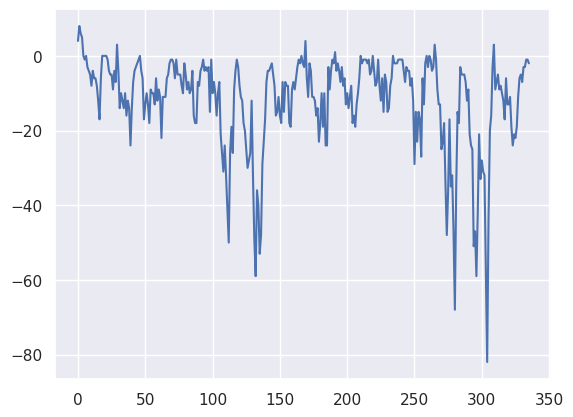

In [44]:
df['Diffrence'].plot(kind='line')
plt.show()

**To identify the location where the difference is the minimum and where you should consider increasing the number of drivers, the following analysis is giving good understanding**

In [45]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'day_of_week', 'flag', 'request_sum',
       'DateTime', 'Ratio', 'Diffrence'],
      dtype='object')

# Co-realetion between Date and other columns

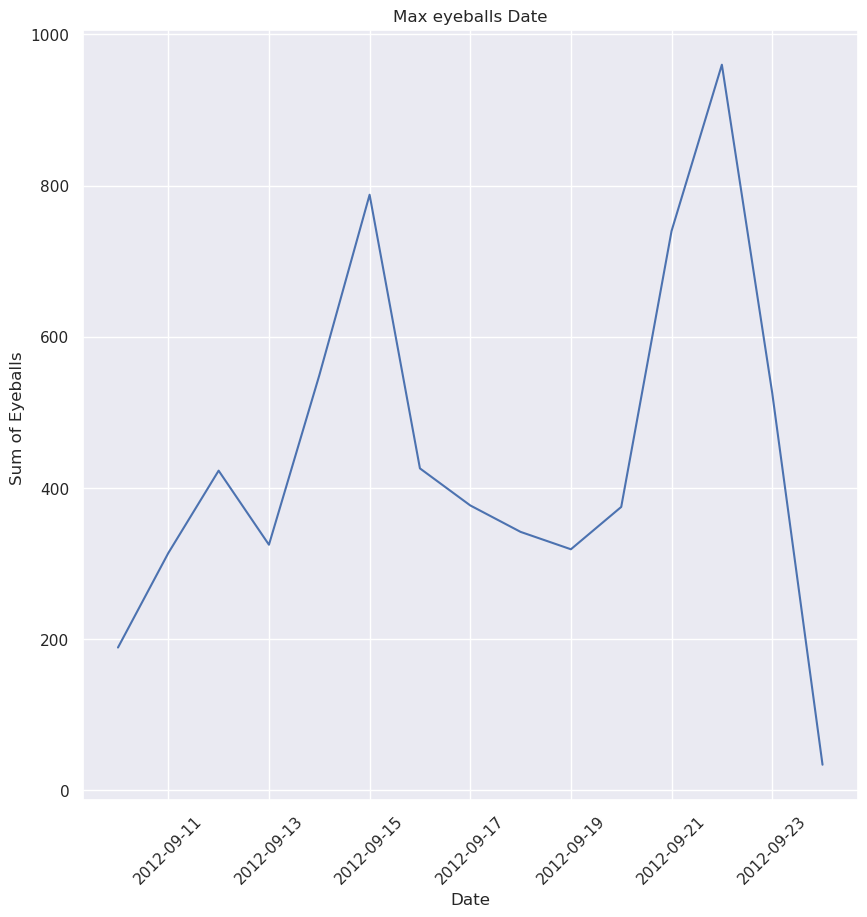

In [46]:
grouped_data = df.groupby('Date')['Eyeballs '].sum().reset_index()
# Plotting the line graph
plt.figure(figsize=(10,10))
plt.plot(grouped_data['Date'],grouped_data['Eyeballs '])
plt.xlabel('Date')
plt.ylabel('Sum of Eyeballs ')
plt.xticks(rotation=45)
plt.title('Max eyeballs Date')
plt.show()



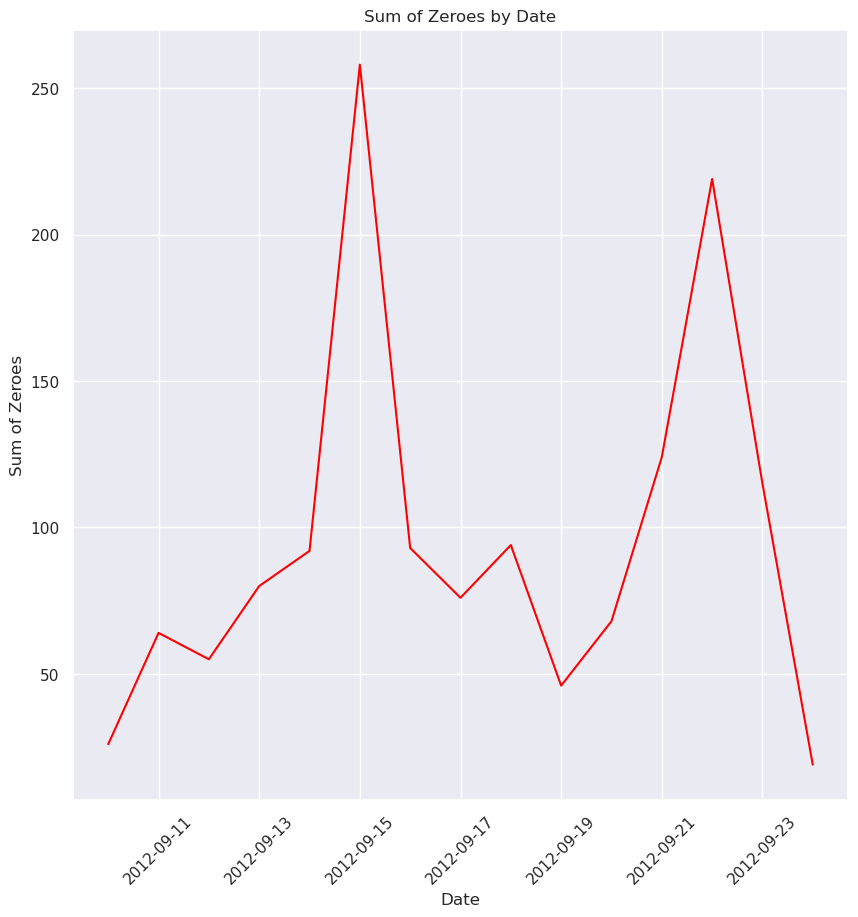

In [47]:
# Group by date and calculate the sum of zeroes for each date
grouped_data = df.groupby('Date')['Zeroes '].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(10,10))
plt.plot(grouped_data['Date'], grouped_data['Zeroes '], color='red')
plt.xlabel('Date')
plt.ylabel('Sum of Zeroes')
plt.title('Sum of Zeroes by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


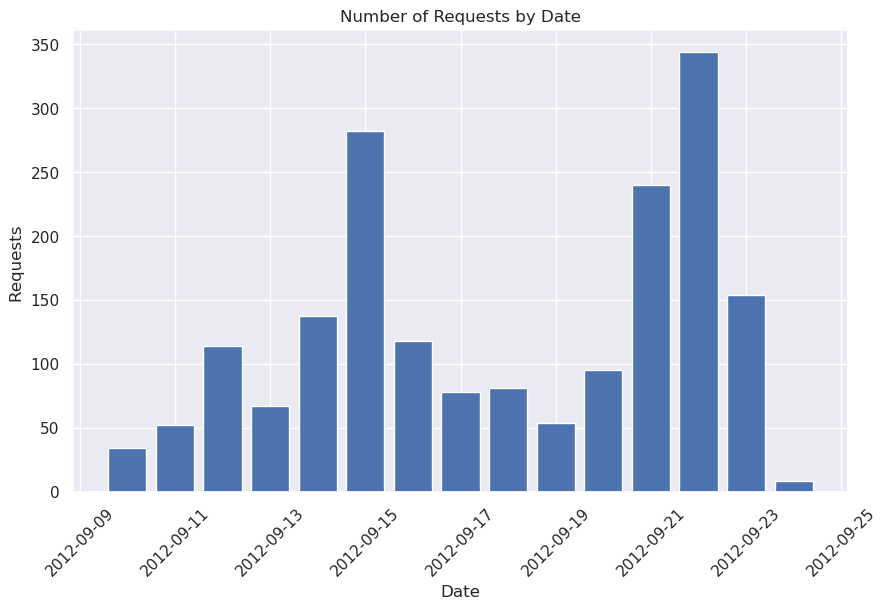

In [48]:
# Assuming you have a DataFrame called 'df' with 'date' and 'completed_trips' columns
data = df.groupby('Date')['Requests '].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Requests '])
plt.xlabel('Date')
plt.ylabel('Requests ')
plt.title('Number of Requests by Date')
plt.xticks(rotation=45)
plt.show()

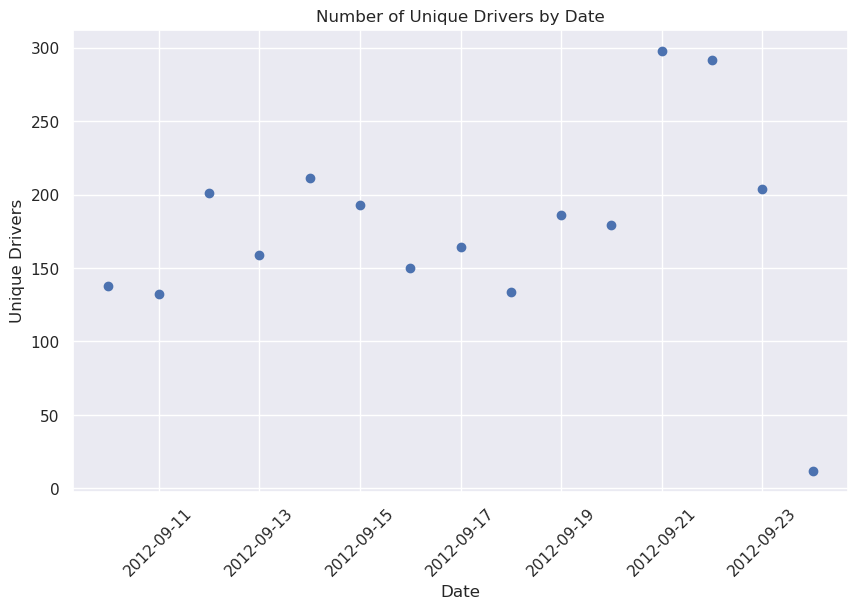

In [49]:
# Assuming you have a DataFrame called 'df' with 'date' and 'unique_drivers' columns
data = df.groupby('Date')['Unique Drivers'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'],data['Unique Drivers'])
plt.xlabel('Date')
plt.ylabel('Unique Drivers')
plt.title('Number of Unique Drivers by Date')
plt.xticks(rotation=45)
plt.show()

# Thank You